In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
!mkdir -p input
!mkdir -p outputs

# Define learning parameters


In [3]:
# learning parameters
batch_size = 512
#for qs # 3
#batch_size = 64
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [4]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [5]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [7]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [8]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [9]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [10]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [11]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    ## if smooting use
    #data = torch.ones(size, 1)*0.9
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [12]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [13]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [14]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

In [15]:

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    loss = criterion(output, true_label)
    return loss
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    
    loss = criterion(output, true_label)
    return loss
    
    ######################################
    


In [16]:
noise.shape

torch.Size([64, 128])

118it [00:22,  5.20it/s]                                                        


Epoch 1 of 100
Generator loss: 0.05659093, Discriminator loss: 0.08232006


118it [00:30,  3.83it/s]                                                        


Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.73it/s]                                                        


Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.81it/s]                                                        


Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                                                        


Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                                                        


Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.58it/s]                                                        


Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.02it/s]                                                        


Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                                                        


Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.75it/s]                                                        


Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.83it/s]                                                        


Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.91it/s]                                                        


Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                                                        


Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                                                        


Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                                                        


Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.91it/s]                                                        


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.85it/s]                                                        


Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.94it/s]                                                        


Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.79it/s]                                                        


Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.83it/s]                                                        


Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.93it/s]                                                        


Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.83it/s]                                                        


Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                                                        


Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                                                        


Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                                                        


Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.72it/s]                                                        


Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.83it/s]                                                        


Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.85it/s]                                                        


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.83it/s]                                                        


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                                                        


Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                                                        


Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                                                        


Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.75it/s]                                                        


Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.68it/s]                                                        


Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.87it/s]                                                        


Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                                                        


Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                                                        


Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.85it/s]                                                        


Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.71it/s]                                                        


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.67it/s]                                                        


Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.84it/s]                                                        


Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.05it/s]                                                        


Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:28,  4.08it/s]                                                        


Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.99it/s]                                                        


Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.01it/s]                                                        


Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.96it/s]                                                        


Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:28,  4.07it/s]                                                        


Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.07it/s]                                                        


Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.01it/s]                                                        


Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.89it/s]                                                        


Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.01it/s]                                                        


Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.00it/s]                                                        


Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:35,  3.33it/s]                                                        


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.83it/s]                                                        


Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.94it/s]                                                        


Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                                                        


Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.03it/s]                                                        


Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.00it/s]                                                        


Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.98it/s]                                                        


Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.06it/s]                                                        


Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.01it/s]                                                        


Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.96it/s]                                                        


Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                                                        


Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.94it/s]                                                        


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.00it/s]                                                        


Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.97it/s]                                                        


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.02it/s]                                                        


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:28,  4.07it/s]                                                        


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:28,  4.09it/s]                                                        


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:28,  4.07it/s]                                                        


Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.06it/s]                                                        


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.02it/s]                                                        


Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.02it/s]                                                        


Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.01it/s]                                                        


Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.03it/s]                                                        


Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.94it/s]                                                        


Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.04it/s]                                                        


Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.97it/s]                                                        


Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.99it/s]                                                        


Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.95it/s]                                                        


Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.96it/s]                                                        


Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.93it/s]                                                        


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.02it/s]                                                        


Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.93it/s]                                                        


Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.95it/s]                                                        


Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.99it/s]                                                        


Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.95it/s]                                                        


Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.97it/s]                                                        


Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.97it/s]                                                        


Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.02it/s]                                                        


Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.90it/s]                                                        


Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.92it/s]                                                        


Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.96it/s]                                                        


Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.90it/s]                                                        


Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.91it/s]                                                        


Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.97it/s]                                                        


Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.93it/s]                                                        


Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.98it/s]                                                        


Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.85it/s]                                                        


Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.92it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


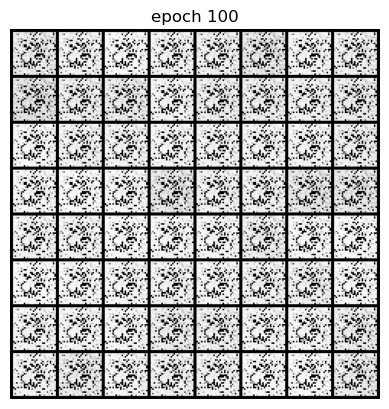

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [17]:
torch.manual_seed(7777)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        batch_size = data[0].shape[0]
        
        ### Training the Discriminator
        noise1 = create_noise(batch_size, nz)
        discriminator.zero_grad()
        fake_sample = generator(noise1)
        disc_realSample = discriminator(data[0]).view(-1)
        #print(disc_realSample.shape)
        lossD_realSample = discriminator_loss(disc_realSample.reshape(batch_size,1), label_real(batch_size))
       
        disc_fakeSample = discriminator(fake_sample).view(-1)
        #print(disc_fakeSample.shape)
        lossD_fakeSample = discriminator_loss(disc_fakeSample.reshape(batch_size,1), label_fake(batch_size)) 
        
        lossD = lossD_realSample + lossD_fakeSample
        #
        #we are trying to minimize the total classification error
        lossD.backward()
        optim_d.step()


        ### Training the Generator
        noise2 = create_noise(batch_size, nz)
        generator.zero_grad()
        fake_sample2 = generator(noise2)
        gen_fakeSample = discriminator(fake_sample2).view(-1)
        #print(gen_fakeSample.shape)
        lossG = generator_loss(gen_fakeSample.reshape(batch_size,1), label_fake(batch_size))#we are trying to maximize the error of classification of fake image by the discriminator
        #
        lossG.backward()
        optim_g.step()
        ######################################
        loss_g+=lossG
        loss_d+=lossD
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 100 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [18]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [19]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

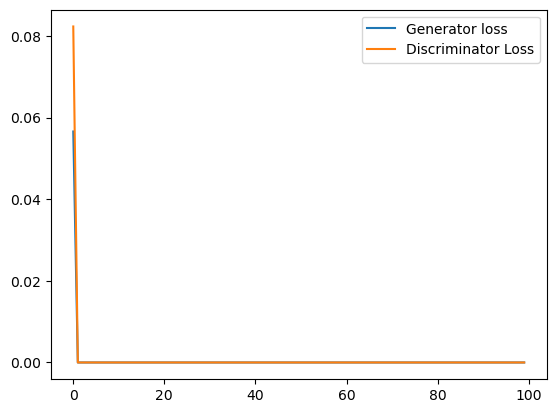

In [20]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(torch.stack(losses_g).detach().numpy(), label='Generator loss')
plt.plot(torch.stack(losses_d).detach().numpy(), label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')